In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from scipy.spatial.distance import mahalanobis
from mpl_toolkits.mplot3d import Axes3D

In [106]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = None
    if unbiased_cov:
        S = ((n - 1.) / n) * np.cov(data, rowvar=False)
    else:
        S = np.cov(data, rowvar=False)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'statistic': None,
        'p-value': None,
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [107]:
np.random.seed(42)

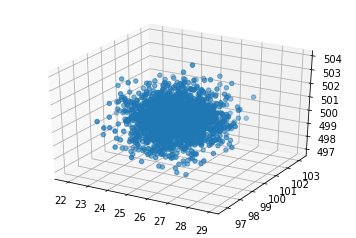

In [108]:
mean = (25, 100, 500)
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x = np.random.multivariate_normal(mean, cov, 2000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()

In [109]:
mardia(x, unbiased_cov=True)

({'p-value': 0.96900483606037913,
  'result': True,
  'statistic': 3.4428036654313612,
  'test': 'Mardia Skewness'},
 {'p-value': 0.75653733804548695,
  'result': True,
  'statistic': 0.31003105837336509,
  'test': 'Mardia Kurtosis'},
 {'p-value': None, 'result': True, 'statistic': None, 'test': 'MVN'})

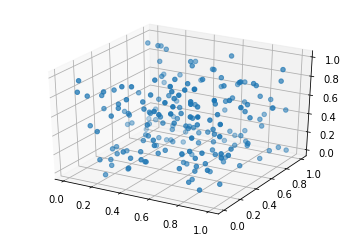

In [105]:
x_random = np.random.rand(200, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_random[:,0], x_random[:,1], x_random[:,2])
plt.show()

In [110]:
mardia(x_random, unbiased_cov=True)

({'p-value': 0.95289245361840214,
  'result': True,
  'statistic': 3.8730445517690213,
  'test': 'Mardia Skewness'},
 {'p-value': 1.819761498356165e-05,
  'result': False,
  'statistic': -4.2859301669979262,
  'test': 'Mardia Kurtosis'},
 {'p-value': None, 'result': False, 'statistic': None, 'test': 'MVN'})